___
# PROJETO 1

## PATRICK DOS SANTOS CÂMARA
___

## SANEAMENTO BÁSICO NO BRASIL

___
## Introdução

### Será analisado o Saneamento Básico no Brasil, ou seja, iremos analisar características que determinam uma  qualidade de vida básica da população do país, sera analisado por região e o Brasil em geral. As variáveis analisadas serão a qualidade da aguá canaizada para os domicílios, a existência de banheiro ou sanitário no domicílio, forma de escoadouro do banheiro ou sanitário, o destino do lixo domiciliar e o tipo de iluminação no domicílio, o que determinam as características de um bom saneamento básico. Junto disso, iremos usar outras variavéis que são, Estado e Renda Mensal, o que irá ajudar para uma melhor análise.


___
## Análise e Resultados

### Nessa Primeira Parte está sendo definido as bibliotecas, o banco de dados, funções e as variaveis que serão utilizadas. As variáveis são:

### -Unidade da Federação (UF)
### -Proveniência da água canalizada utilizada no domicílio (V0212)
### -Tem banheiro ou sanitário no domicílio ou na propriedade (V0215)
### -Forma de escoadouro do banheiro ou sanitário (V0217)
### -Destino do lixo domiciliar (V0218)
### -Forma de iluminação do domicílio (V0219)
### -Rendimento Mensal domiciliar (V4614)

### Também esta sendo feita a verificação da biblioteca, para caso ela tenha algum problema.

In [1]:
#Importando as bibliotecas que serão utilizadas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Patrick dos Santos\Downloads


In [3]:
#importando banco de dados: 'PNAD2015'
dados2015=pd.read_csv('DOM2015.csv',sep=',')

In [4]:
#Verificação do banco de dados
dados2015.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V4611,V4614,UPA,V4617,V4618,V4620,V4621,V4622,V4624,V9992
0,0,2015,11,15,1,1,1.0,1.0,1.0,4.0,...,270.0,800.0,191,110001,1,1.0,800.0,4.0,1.0,20161104
1,1,2015,11,15,2,6,NaN,NaN,NaN,NaN,...,NaN,NaN,191,110001,1,NaN,NaN,NaN,NaN,20161104
2,2,2015,11,15,3,1,1.0,1.0,1.0,4.0,...,270.0,1150.0,191,110001,1,1.0,1150.0,4.0,1.0,20161104
3,3,2015,11,15,4,1,6.0,4.0,1.0,2.0,...,270.0,4760.0,191,110001,1,6.0,793.0,4.0,2.0,20161104
4,4,2015,11,15,5,1,2.0,2.0,1.0,2.0,...,271.0,5800.0,191,110001,1,2.0,2900.0,6.0,2.0,20161104


In [5]:
#Definindo Variáveis que serão utilizadas
dadosUF2015 = dados2015.UF.astype('category')
dadosAgCan2015 = dados2015.V0212.astype('category')
dadosAgCan2015.cat.categories = ('Rede Geral de Distribuição', 'Poço ou Nascente', 'Outra proveniência')
dadosBan2015 = dados2015.V0215.astype('category')
dadosBan2015.cat.categories = ('Sim', 'Não')
dadosEsco2015 = dados2015.V0217.astype('category')
dadosEsco2015.cat.categories = ('Rede Coletora de Esgoto ou Pluvial', 'Fossa Séptica Ligada a rede coletora de esgoto ou pluvial'
                                 , 'Fossa Séptica Não Ligada a rede coletora de esgoto ou pluvial', 'Fossa Rudimentar', 'Vala',
                                'Direto para Rio, Lago ou Mar', 'Outro Destino')
dadosLixo2015 = dados2015.V0218.astype('category')
dadosLixo2015.cat.categories = ('Coletado diretamente', 'Coletado indiretamente', 'Queimado ou enterrado na propriedade',
                               'Jogado em terreno baldio ou logradouro','Jogado em rio, lago ou mar', 'Outro destino')
dadosLuz2015 = dados2015.V0219.astype('category')
dadosLuz2015.cat.categories = ('Elétrica', 'Óleo, querosene ou gás de botijão', 'Outra forma')
dadosRenMen2015 = dados2015.V4614[dados2015.V4614 < 100000]
dadosRenMen2015 = dadosRenMen2015.astype('float')

In [6]:
#Criando uma variável REGIAO a partir das Unidade da Federação, a pesquisa será trabalhada comparando 
#as regiões do Brasil
dados2015["REGIAO"]='x'
dados2015.loc[(dados2015['UF'] >=10) & (dados2015['UF'] < 20),'REGIAO'] = 'Norte'
dados2015.loc[(dados2015['UF'] >=20) & (dados2015['UF'] < 30),'REGIAO'] = 'Nordeste'
dados2015.loc[(dados2015['UF'] >=30) & (dados2015['UF'] < 40),'REGIAO'] = 'Sudeste'
dados2015.loc[(dados2015['UF'] >=40) & (dados2015['UF'] < 50),'REGIAO'] = 'Sul'
dados2015.loc[(dados2015['UF'] >=50) & (dados2015['UF'] < 60),'REGIAO'] = 'Centro-Oeste'
dadosREGIAO2015=dados2015.REGIAO

In [7]:
#Definindo a função que será utilizada posteriormente
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

### Iremos seguir uma rota para dar início a nossa pesquisa, primeiramente iremos analisar o Brasil e suas regiões para cada tipo de variável e determinar para cada uma delas quais são os problemas que devem ser melhorados e as regiões mais problemáticas.

## SITUAÇÃO DA DISTRIBUIÇÃO DE ÁGUA NO BRASIL

### Para iniciar a situação da distribuição de água no Brasil, iremos analisar qual é a proveniência dessa água:
### - Rede Geral de Distribuição
### - Poço ou Nascente
### - Outra proveniência

### O gráfico a seguir mostra a proveniência da Água em todo o Brasil:

Frequências relativas por Tipo de Providência da Aguá Canalizada utilizada no Domicílio:
Rede Geral de Distribuição    64.7
Poço ou Nascente               9.3
Outra proveniência             0.3
dtype: float64 



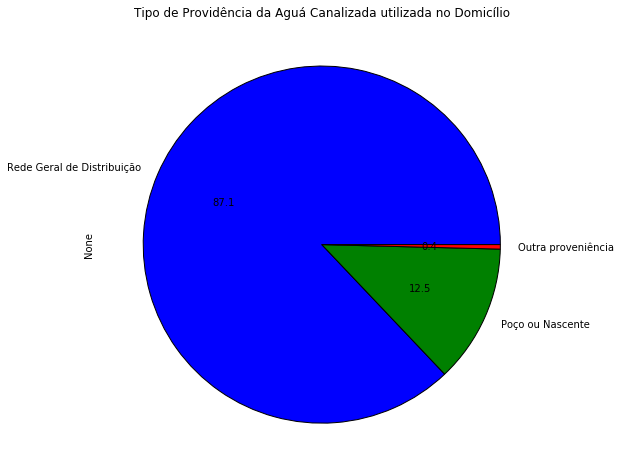

In [8]:
print('Frequências relativas por Tipo de Providência da Aguá Canalizada utilizada no Domicílio:')
ut1 = (dadosAgCan2015.value_counts(True)*100).round(decimals=1)
print(ut1,'\n')
plot = ut1.plot(kind='pie',title='Tipo de Providência da Aguá Canalizada utilizada no Domicílio',autopct='%.1f',figsize=(8, 8))

### Podemos perceber que nem toda a população brasileira recebe água da rede geral de distribuição, 12,5% da população usa água de poço e nascente, isso demostra um problema para essa população por não receber essa água na qualidade desejada. Assim, podemos registrar esse problema no Brasil, mas definimos ele como não alarmante, mas deixamos em vigia para não deixar aumentar essa porcentagem e sim, diminuir. Vamos verificar agora em qual região há um maior problema.

In [9]:
print('Tabela Cruzada por total GERAL:')
ct=pd.crosstab(dadosAgCan2015,dadosREGIAO2015,margins=True,rownames=['PROVIDÊNCIA DA ÁGUA'], colnames=['REGIÕES'])
ct

Tabela Cruzada por total GERAL:


REGIÕES,Centro-Oeste,Nordeste,Norte,Sudeste,Sul,All
PROVIDÊNCIA DA ÁGUA,,,,,,
Rede Geral de Distribuição,10759,26330,10369,33120,17308,97886
Poço ou Nascente,1574,2952,4763,2674,2049,14012
Outra proveniência,18,302,93,68,19,500
All,16235,43434,21442,45546,24532,151189


In [10]:
n=ct.iloc[3,5]

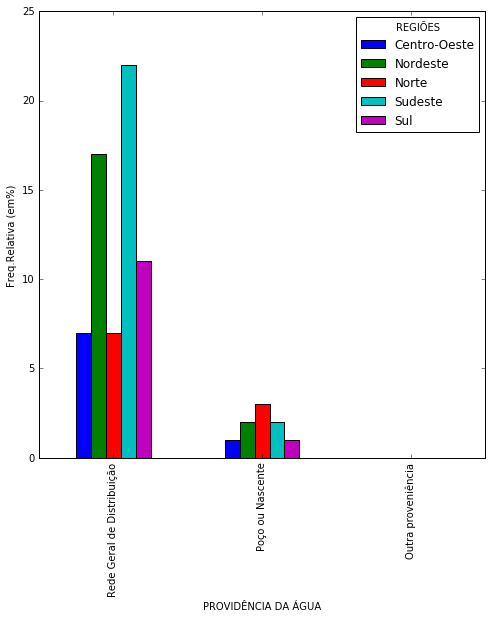

In [11]:
ct1 = pd.crosstab(dadosAgCan2015,dadosREGIAO2015,margins=True,rownames=['PROVIDÊNCIA DA ÁGUA'], colnames=['REGIÕES'])
ct1 = (ct1/n*100).round(decimals=0)
ct1 = ct1.iloc[0:3,0:5]
plot = ct1.plot(kind='bar',figsize=(8, 8))
plt.ylabel('Freq.Relativa (em%)')

### Esse gráfico está dividido por regiões, com ele podemos tirar novas conclusões:

### - Dentre as regiões, a Região Norte representa um alto número de pessoas que utilizam poços e nascentes comparado com o total da população, e comparando com a de rede geral de distribuição, a diferença é muito pequena entre o percentual das duas. Assim podemos concluir que na região Norte, grande parte da população realmente utiliza poço e nascente como meios de obtenção de água.

### - A região Centro-Oeste tem um situação similar a Região Norte, mas nãó é possivel determinar com exatidão.

### - A região Sudeste apresenta um estado totalmente o oposto da região Norte.

### - As regiões Sul e Nordeste apresentam situação similar, mas nada alarmante como a região Norte.

### Agora iremos analisar o percentual de uso de cada Região para os tipos de proveniência:

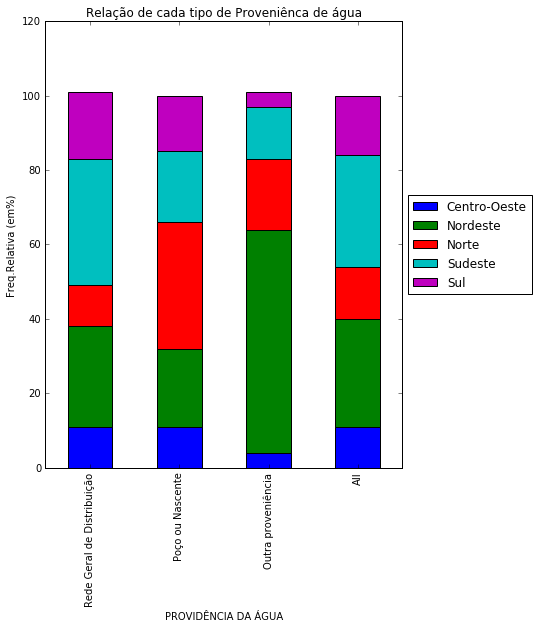

In [12]:
ct2 = pd.crosstab(dadosAgCan2015,dadosREGIAO2015,margins=True,rownames=['PROVIDÊNCIA DA ÁGUA'], colnames=['REGIÕES']).apply(percConvert, axis=1)
ct2 = ct2.iloc[:,0:5]
plot = ct2.plot(kind='bar', stacked=True,title='Relação de cada tipo de Proveniênca de água',figsize=(8, 8))
plt.ylabel('Freq.Relativa (em%)')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Com esse novo gráfico e utilizando as conclusões do gráfico anterior, podemos chegar a conclusões definitivas e mais concretas sobre a proveniência da água no Brasil. Primeiramente, podemos ja definir que a região Norte esta em uma situação alarmante em relação as outras regiões, é necessário uma intervenção no Norte em relação a distribuição de água. 
### Para a região Nordeste, é necessário avaliar onde esta ocorrendo essa outra forma de Proveniência de Aguá, mesmo que seja pequeno em relação as outras proveniência, ele representa um percentual alto em relação ao nacional. 
### Para demais regiões, existe o problema mas ele é muito amenizado, assim não tem uma importância agora, talvez só em regiões isoladas, como favelas, comunidades e cortiços.

## SITUAÇÃO SANITÁRIA DO BRASIL

### Seguindo a pesquisa, iremos analisar a situação Sanitária do Brasil, para isso, iremos utilizar duas variáveis, a existência de banheiro ou sanitário no domicílio e o tipo de escoadouro destes. Primeiro iremos verificar se existe um problema em relação a existencia de banheiros e sanitários e depois analizaremos se eles são de qualidade ou não.

### O gráfico a seguir mostra a existência de banheiros e sanitários:

Frequências relativas para a Existência de banheiro ou sanitário no domicílio ou na propriedade:
Sim    76.3
Não     1.5
dtype: float64 



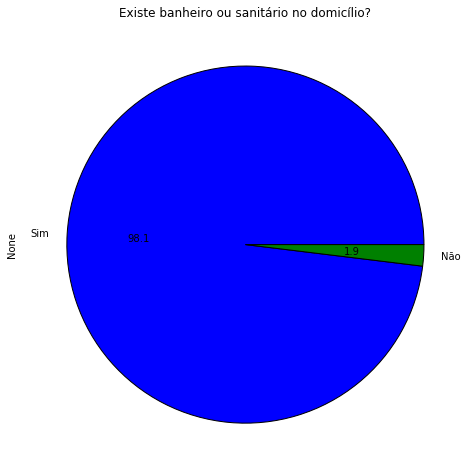

In [13]:
print('Frequências relativas para a Existência de banheiro ou sanitário no domicílio ou na propriedade:')
ut2 = (dadosBan2015.value_counts(True)*100).round(decimals=1)
print(ut2,'\n')
plot = ut2.plot(kind='pie',title='Existe banheiro ou sanitário no domicílio?',autopct='%.1f',figsize=(8, 8))

### Com esse gráfico, podemos concluir que a existência de banheiro e sanitário não é um problema para a população brasileira, já que 98,1% da população tem banheiro em seu domicílio. Porém isso não determina se a situação sanitária do Brasil é de qualidade, para isso, iremos analisar onde que a água usada em banheiros é despejada. Isso está explicito no gráfico a seguir:

Frequências relativas por Tipo de Providência da Aguá Canalizada utilizada no Domicílio:
Rede Coletora de Esgoto ou Pluvial                               42.1
Fossa Séptica Não Ligada a rede coletora de esgoto ou pluvial    13.5
Fossa Rudimentar                                                 12.5
Fossa Séptica Ligada a rede coletora de esgoto ou pluvial         5.9
Direto para Rio, Lago ou Mar                                      1.2
Vala                                                              1.0
Outro Destino                                                     0.1
dtype: float64 



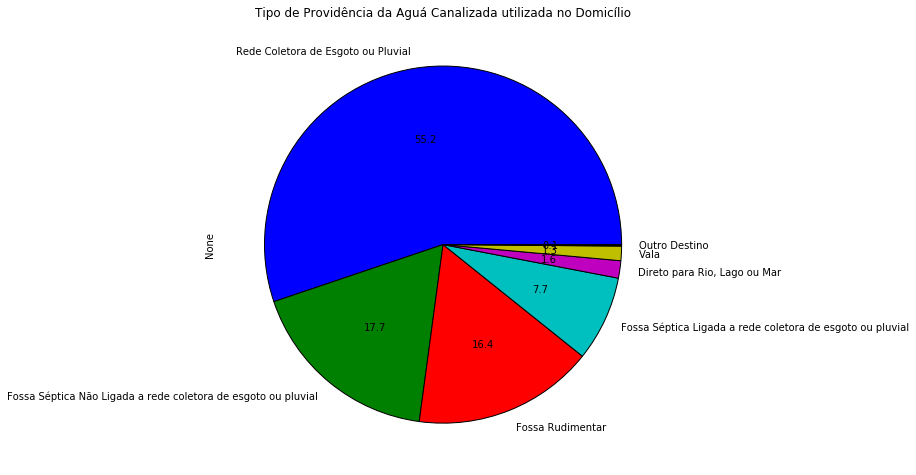

In [14]:
print('Frequências relativas por Tipo de Providência da Aguá Canalizada utilizada no Domicílio:')
ut3 = (dadosEsco2015.value_counts(True)*100).round(decimals=1)
print(ut3,'\n')
plot = ut3.plot(kind='pie',title='Tipo de Providência da Aguá Canalizada utilizada no Domicílio',autopct='%.1f',figsize=(8, 8))

### Esse gráfico mostra o tipo de escoadouro presente na população brasileira. Com ela podemos ver que pouco mais de 60% da população tem um escoadouro de qualidade (Rede Coletora de Esgoto ou Pluvial + Fossa Séptica Ligada a rede de esgoto), o resto da população tem um despejo irregular do esgoto, usando valas, fossas rudimentares e, rio e lagos. Com esse despejo irregular, a transmissão de doenças é maior, o que resulta em uma saúde pior para a população, o que resulta também em um mal saneamento básico. Para um bom saneamento básico, é necessário que essa população tenha um escoadouro de qualidade. 

### Com esse gráfico só podemos definir que o Brasil tem um sério problema em relação ao despejo do esgoto, sendo qualificado uma situação de risco. Em relação a distribuição de água analisada anteriormente, o escoadouro apresenta maior prioridade, já que afeta maior número de população e traz mais riscos a saúde.

### Para ter uma analise mais detalhada sobre o Brasil, iremos analisar por Região, definindo quais necessitam de maior atenção:

In [15]:
print('Tabela Cruzada por total GERAL:')
ct3=pd.crosstab(dadosEsco2015,dadosREGIAO2015,margins=True,rownames=['FORMA DE ESCOADOURO'], colnames=['REGIÕES'])
ct3

Tabela Cruzada por total GERAL:


REGIÕES,Centro-Oeste,Nordeste,Norte,Sudeste,Sul,All
FORMA DE ESCOADOURO,,,,,,
Rede Coletora de Esgoto ou Pluvial,6139,13801,2638,30647,10443,63668
Fossa Séptica Ligada a rede coletora de esgoto ou pluvial,808,1666,1817,1145,3413,8849
Fossa Séptica Não Ligada a rede coletora de esgoto ou pluvial,2160,6611,6467,1496,3632,20366
Fossa Rudimentar,3347,8022,4207,1687,1668,18931
Vala,10,679,437,292,154,1572
"Direto para Rio, Lago ou Mar",7,339,488,824,92,1750
Outro Destino,3,55,59,30,12,159
All,16235,43434,21442,45546,24532,151189


In [16]:
n=ct3.iloc[7,5]

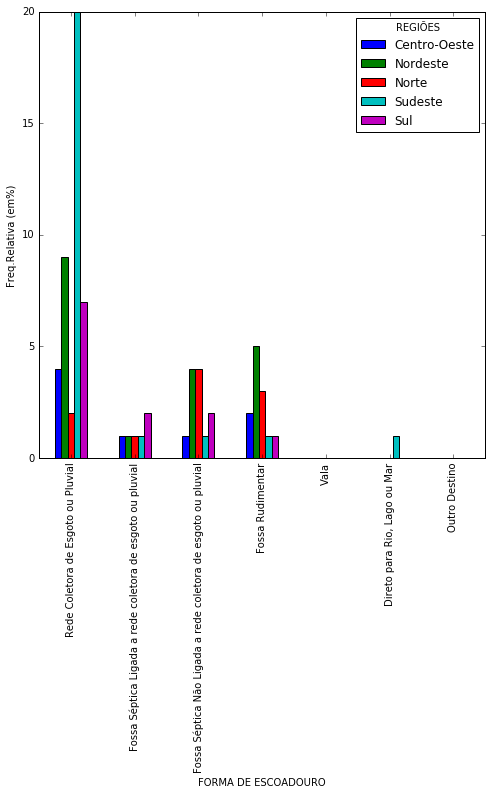

In [17]:
ct3 = pd.crosstab(dadosEsco2015,dadosREGIAO2015,margins=True,rownames=['FORMA DE ESCOADOURO'], colnames=['REGIÕES'])
ct3 = (ct3/n*100).round(decimals=0)
ct3 = ct3.iloc[0:7,0:5]
plot = ct3.plot(kind='bar',figsize=(8, 8))
plt.ylabel('Freq.Relativa (em%)')

### Como realizado para a situação de distribuição de água no Brasil, dividimos o gráfico de todo o Brasil, por região, porém ao contrario da primeira análise, não podemos chegar a boas conclusões, pois o gráfico tem uma dificil análise de dados pelo número de variavéis. Assim, iremos analisar com o próximo tipo de gráfico, também utilizado na análise da situação anterior, que é o percentual de cada região para cada tipo de escoadouro:

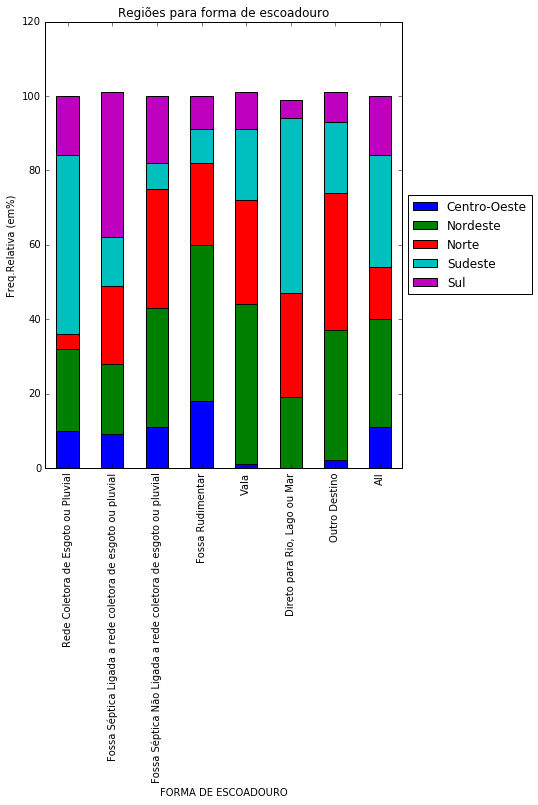

In [18]:
ct4 = pd.crosstab(dadosEsco2015,dadosREGIAO2015,margins=True,rownames=['FORMA DE ESCOADOURO'], colnames=['REGIÕES']).apply(percConvert, axis=1)
ct4 = ct4.iloc[:,0:5]
plot = ct4.plot(kind='bar', stacked=True,title='Regiões para forma de escoadouro',figsize=(8, 8))
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Com esse gráfico, conseguimos avaliar melhor a situação e podemos concluir várias coisas. Ao analisar o gráfico do tipo por tipo de escoadouro, podemos definir que:

### - A região nordeste apresenta uma alta porcentagem em relação uso de fossa rudimentar e ao uso de Valas, de todo o uso de valas no Brasil, o nordeste representa cerca de 50%, o mesmo acontece para as fossas rudimentares. E isso necessita de muita atenção para a região, é alarmante a necessidade do uso de outro tipo de escoadouro. Para o tipo de população, clima e densidade populacional do nordeste, pode-se trocar as fossas rudimentares por fossas sépticas, o que mantem uma melhor higiene na região, já nas grandes cidades, é necessário melhorar o uso da rede coletora de esgoto.

### - Em relação ao despejo em lago e rios, podemos perceber um grande número da região sudeste, mas ela também apresenta um maior número na rede coletora de esgotos, assim podemos concluir que no sudeste existe uma boa forma de escoadouro em geral, mas para os casos de pessoas que não tem acesso ao esgoto, eles geralmente depositam em rio, lago e mar. Para solucionar isso, pode-se criar programas de conscientização e levar o esgoto até elas.

### - Em relação a região Norte, podemos concluir que em relação a todos os tipos de escoadouro de baixa qualidade, a região norte é o que contém mais participação nelas. Assim é necessário fazer uma verificação do caso, mas é bem provavel que, por falta de uma rede coletora de qualidade, a população adere a outros meios de se livrar do seu esgoto. Isso resulta num problema de saúde para a população em geral e diminui a qualidade do saneamento básico na região.

## SITUAÇÃO DO DESTINO DO LIXO NO BRASIL

### Para falar sobre a situação do destino do lixo no Brasil, iremos analisar quais é seus possiveis destinos:
### - Coletado Diretamente
### - Queimado ou enterrado na propriedade
### - Coletado indiretamente 
### - Jogado em terreno baldio ou logradouro 
### - Jogado em rio, lago ou mar 
### - Outro destino


Frequências relativas do Destino do Lixo Domiciliar:
Coletado diretamente                      64.6
Queimado ou enterrado na propriedade       7.2
Coletado indiretamente                     5.4
Jogado em terreno baldio ou logradouro     0.5
Outro destino                              0.1
Jogado em rio, lago ou mar                 0.0
dtype: float64 



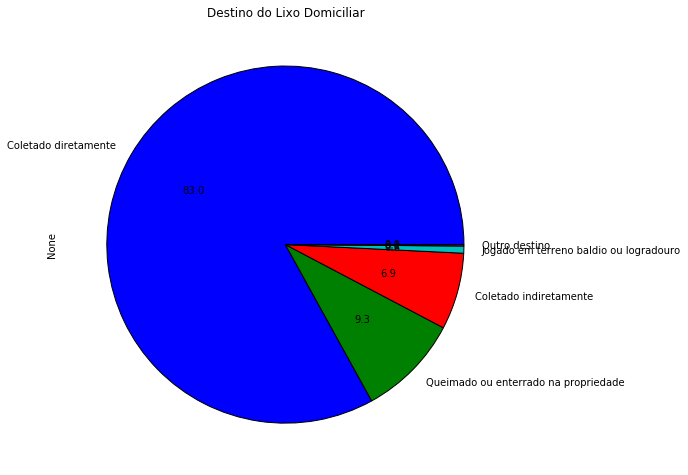

In [19]:
print('Frequências relativas do Destino do Lixo Domiciliar:')
ut4 = (dadosLixo2015.value_counts(True)*100).round(decimals=1)
print(ut4,'\n')
plot = ut4.plot(kind='pie',title='Destino do Lixo Domiciliar',autopct='%.1f',figsize=(8, 8))

### Com o primeiro gráfico podemos concluir que o destino do lixo não é um problema muito evidente, comparado ao tipo de escoadouro no Brasil. A maior parte do lixo é coletado diretamente ou indiretamente, só sobra cerca de 10% de destido irregular do lixo, isso é um problema e deve ser tratado, mas não de uma situação tão crítica como a do escoadouro. Assim, podemos chegar a uma conclusão que o lixo não é um problema de nivel nacional. Vamos avaliar por região e evidenciar isso com mais detalhes.

### Comparado as analises anteriores, não é necessário fazer a divisão por região pois iremos ter um problema parecido com a analise do destino do lixo, é grande o número de variaveis e isso deixa a leitura do gráfico mais dificil. Por esse motivo já partimos para o gráfico do percentual de região para cada tipo de destino do lixo.

In [20]:
print('Tabela Cruzada por total GERAL:')
ct5=pd.crosstab(dadosLixo2015,dadosREGIAO2015,margins=True,rownames=['DESTINO DO LIXO'], colnames=['REGIÕES'])
ct5

Tabela Cruzada por total GERAL:


REGIÕES,Centro-Oeste,Nordeste,Norte,Sudeste,Sul,All
DESTINO DO LIXO,,,,,,
Coletado diretamente,11025,23213,13026,32713,17628,97605
Coletado indiretamente,534,3876,731,2108,957,8206
Queimado ou enterrado na propriedade,914,4915,2829,1315,858,10831
Jogado em terreno baldio ou logradouro,17,544,150,72,20,803
"Jogado em rio, lago ou mar",0,7,38,8,1,54
Outro destino,29,20,10,21,22,102
All,16235,43434,21442,45546,24532,151189


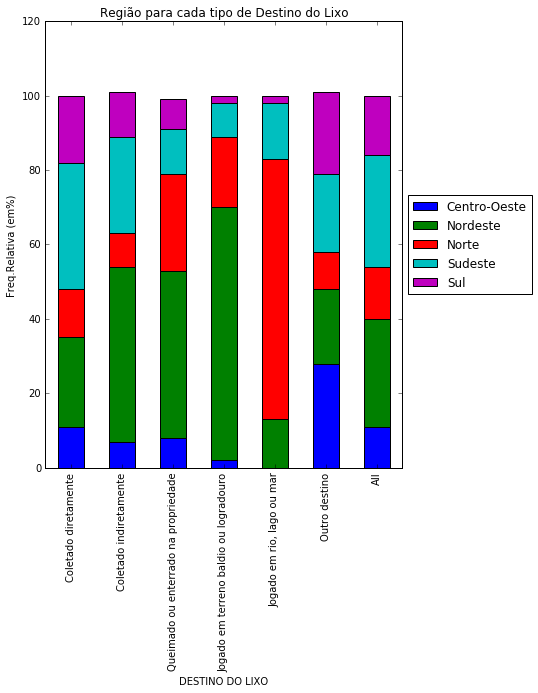

In [21]:
ct6 = pd.crosstab(dadosLixo2015,dadosREGIAO2015,margins=True,rownames=['DESTINO DO LIXO'], colnames=['REGIÕES']).apply(percConvert, axis=1)
ct6 = ct6.iloc[:,0:5]
plot = ct6.plot(kind='bar', stacked=True,title='Região para cada tipo de Destino do Lixo',figsize=(8, 8))
plt.ylabel('Freq.Relativa (em%)')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Nesse gráfico é muito visível a característica de duas regiões, Norte e Nordeste. Podemos concluir em relação a elas que:

### - A região Norte apresenta uma alta porcentagem no despejo do lixo em rio, lagos ou mar, é alarmante isso já que a região norte apresenta tambem um alto nivel de abastecimento de água a partir de poços e nascentes, como analisado anteriormente, isso pode piorar a saúde da população novamente. Além disso, o despejo do lixo em rios e lagos pode destruir a rica fauna da região e poluindo importantes rios. Assim, é necessário uma intervenção no destino do lixo, procurando um destino melhor para este.

### - Para o caso da região Nordeste, podemos perceber uma grande participação no despejo do lixo em terrenos baldios ou queimados, isso também pode prejudicar o meio ambiente da região e a saúde da população. Como para a região norte, é preciso achar um destino melhor para esse lixo.

## SITUAÇÃO DA ILUMINAÇÃO NO BRASIL

### Agora será analisada o tipo de iluminação presente nas casas do Brasil, serão classificadas entre: Elétrica, Óleo ou outra forma. Isso também entra na avaliação de um bom saneamento básico. Primeiramente iremos analisar a situação para todo o Brasil:

Frequências relativas por Forma de Iluminação no Domicílio:
Elétrica                             77.5
Óleo, querosene ou gás de botijão     0.2
Outra forma                           0.1
dtype: float64 



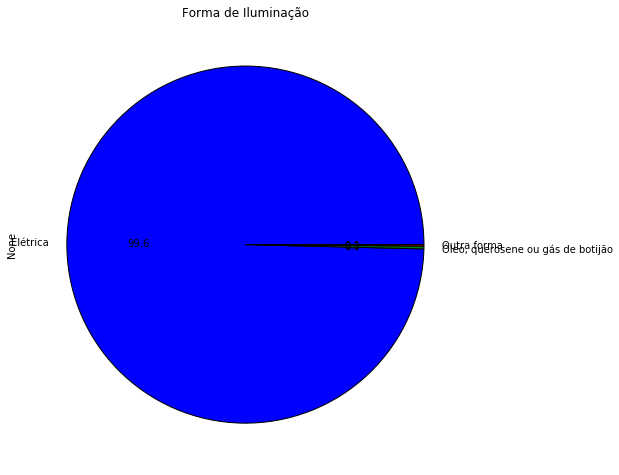

In [22]:
print('Frequências relativas por Forma de Iluminação no Domicílio:')
ut5 = (dadosLuz2015.value_counts(True)*100).round(decimals=1)
print(ut5,'\n')
plot = ut5.plot(kind='pie',title='Forma de Iluminação',autopct='%.1f',figsize=(8, 8))

### Com esse gráfico podemos concluir que a qualidade da iluminação no Brasil não é um problema já que 99,6% da população tem acesso a luz elétrica, ou seja, pouquíssima parte da população sofre com a falta de energia elétrica. nesse caso não será necessário analisar a variavel com maior detalhe, já que, em nivel nacional, não é visivel nenhum problema em relação a iluminação.

## Renda Mensal no Brasil

### Agora iremos avaliar a Renda Mensal da População do Brasil e analisar o caso da renda para cada região. E tentaremos chegar a algumas conclusões relacionadas a renda para que comparamos com as situações analisadas anteriormente. Primeiramente iremos analisar a renda em nivel nacional, depois verificaremos através das regiões.

In [23]:
dadosRenMen2015.describe()

count    115615.000000
mean       3130.600450
std        4114.604497
min           0.000000
25%        1100.000000
50%        1988.000000
75%        3500.000000
max       92000.000000
Name: V4614, dtype: float64

### Primeiro fizemos uma descrição dos dados que serão analizados e podemos retirar dele a média da Renda Mensal do brasileiro, a mediana e tambem outros resultados. Mas o importante é a média que é de 3130,00 Reais, em torno de 3 a 4 salários mínimos, não é mal para a população brasileira em geral. Para ter uma melhor visualização da distribuição desses dados, podemos transforma-las em um histograma, isso deixará evidente qual faixa de renda é mais usada no Brasil e onde estaria situada a média.

In [24]:
from numpy import arange
faixa = arange(0,20000,800)

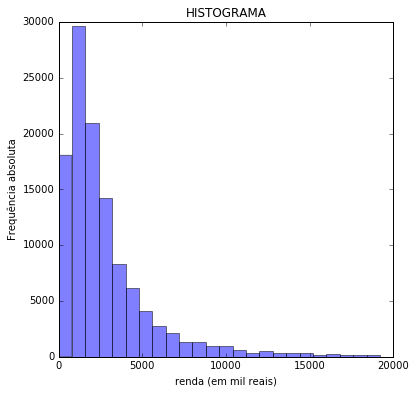

In [25]:
plot = dadosRenMen2015.plot.hist(bins=faixa,title='HISTOGRAMA', figsize=(6, 6), alpha=0.5)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em mil reais)')

### Com esse Histograma, podemos verificar que a faixa entre 2 ou 3 salários mínimos é a mais frequente pelos brasileiros, não é uma faixa muito alta, assim podemos concluir que o Brasil enfrenta um seguinte problema, "existe muita gente com pouco e pouco com muito", ou seja, existe pouca gente muito rica e muita gente pobre, isso faz com que a curva do Histograma não seja simétrico. 

### Para uma análise mais detalhada do Brasil, iremos avaliar região por região, iremos fazer um boxplot que consegue fornecer vários resultados ao mesmo tempo, assim podemos avaliar todas as regiões em diferentes características:

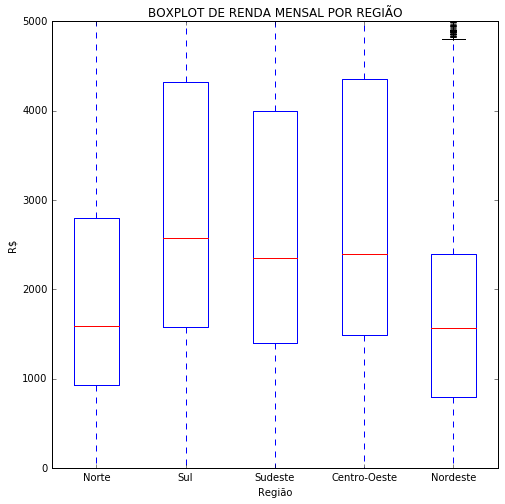

In [26]:
ValorRenMen=pd.DataFrame([dadosRenMen2015[dadosREGIAO2015=="Norte"],dadosRenMen2015[dadosREGIAO2015=="Sul"],
                          dadosRenMen2015[dadosREGIAO2015=="Sudeste"],dadosRenMen2015[dadosREGIAO2015=="Centro-Oeste"],
                          dadosRenMen2015[dadosREGIAO2015=="Nordeste"]], 
                   index= ["Norte","Sul","Sudeste","Centro-Oeste","Nordeste"])
plot = ValorRenMen.T.plot.box(title='BOXPLOT DE RENDA MENSAL POR REGIÃO', figsize=(8, 8))
plt.ylabel("R$")
plt.xlabel("Região")
plt.ylim(0,5000)
plt.show()

### Com esse boxplot, podemos verificar que a media da renda mensal para as regiões Norte e Nordeste são baixas em relação as outras, ou seja, as pessoas dessa região ganham menos que as demais. Isso pode resultar ao baixo acesso das pessoas a uma boa educação e saúde, qualidade de vida e infraestrutura de seus domicílios. É visivel isso no nosso dia-a-dia, vemos que no norte e nordeste estão concentradas muitas famílias carentes e necessitadas de uma boa infraestrutura. Além disso, a baixa renda mensal nessas regiões estão diretamente ligadas ao saneamento básico, pois se o governo não os auxiliam, não tem como eles próprios arrumarem os problemas presentes no seu dia-a-dia. 

___
## Conclusão 

### Primeiramente, analisando os dados de várias situações (Distribuição de Água, Destino do Lixo e Destino do Esgoto) que a região Norte e Nordeste contem um saneamento básico bem carente e humilde, necessitando de um auxilio maior em relação as outras regiões. E avaliando a Renda Mensal dessas regiões, podemos ver que ela esta estritamente ligada ao saneamento básico, pois quanto menor a Renda, menor será o acesso das pessoas a uma boa infraestrutura de seus lares e bairros.

### Dessa maneira, é exigido uma atenção maior do governo e ONGs para essas regiões, visando um aumento na qualidade de vida dessa população. Não há como discordar que essas regiões estão em estados alarmantes, uma demora no auxílio pode acarretar problemas maiores e irretornáveis. 

### Mas também é necessário deixar claro que as demais regiões também apresentam certos problemas mas a solução para elas é de fácil acesso.

### Por fim, podemos concluir que o saneamento básico no Brasil em geral não é uma das melhores, é necessário uma reforma para deixar a qualidade de toda a população satisfatória.
